In [1]:
import matplotlib.pyplot as plt
import numpy as np

linesnames=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming']
columnsnames=['Murder', 'Assault', 'UrbanPop', 'Rape']

np.savetxt('states.txt',linesnames, fmt='%s')

np.savetxt('crime_var.txt',columnsnames,fmt='%s')
#remark : if fmt='%s' doesn't work use dtype='U'
test=np.genfromtxt('states.txt',delimiter='\n',dtype='U')
print('test',test)

matrixX=np.loadtxt('USarrestdata.txt')

test ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [2]:

print('shape of data',np.shape(matrixX))

numb_points=np.shape(matrixX)[0]
numb_variables=np.shape(matrixX)[1]

#you want the mean numbers of crimes etc, so you take the mean over the lines (axis=0)
colmeanX=np.mean(matrixX,axis=0)
print('means',colmeanX)

temp= np.repeat([colmeanX],[numb_points],axis=0).T

matrixXN=matrixX - np.repeat([colmeanX],[numb_points],axis=0)

print('should be zeros',np.mean(matrixXN,axis=0))

#set all variances to one. 
strdev_array= [np.sqrt(np.var(matrixXN[:,i])) for i in range(numb_variables)]

matrixXNN=matrixXN/strdev_array

matrixM = np.dot(matrixXNN.T,matrixXNN)/numb_points

eigvalsX, eigvectX = np.linalg.eig(matrixM)
v1=eigvectX.T[0]
v2=eigvectX.T[1]
v4=eigvectX.T[2]
v3=eigvectX.T[3]

coordchange  = eigvectX 

#test

np.dot(np.dot(coordchange.T,matrixM),coordchange)

Z = 

print('eigenvalues',eigvalsX)
print('should be ones',[np.var(matrixXNN[:,i]) for i in range(numb_variables)])

shape of data (50, 4)
means [   7.788  170.76    65.54    21.232]
should be zeros [  6.03961325e-16   9.09494702e-15  -6.25277607e-15   7.56728014e-15]
eigenvalues [ 2.48024158  0.98976515  0.17343009  0.35656318]
should be ones [1.0000000000000002, 1.0000000000000002, 1.0, 0.99999999999999989]


In [3]:
coordchange=np.array([v1,v2,v3,v4])
coordchange=coordchange.T
invcoordchange=np.linalg.inv(coordchange)



Let us plot data in a 2d plane (spanneed by pca1 and pca2)

In [4]:
#creating empty arrows to put the "xy" points in terms of the new coordinats xp and yp (the PCA coordinates)
x1=matrixXNN[:,0]
x2=matrixXNN[:,1]
x3=matrixXNN[:,2]
x4=matrixXNN[:,3]

x1p= np.array([])
x2p=np.array([])
x4p=np.array([])
x3p=np.array([])
for kk in range(numb_points):
    temp=np.dot(invcoordchange,[x1[kk],x2[kk],x3[kk],x4[kk]])
    x1p=np.append(x1p,temp[0])
    x2p=np.append(x2p,temp[1])
    x3p=np.append(x3p,temp[2])
    x4p=np.append(x4p,temp[3])

meanpca=[np.mean(x1p),np.mean(x2p)]
#should be zero
meanpca

[4.7961634663806766e-16, 3.3750779948604759e-16]

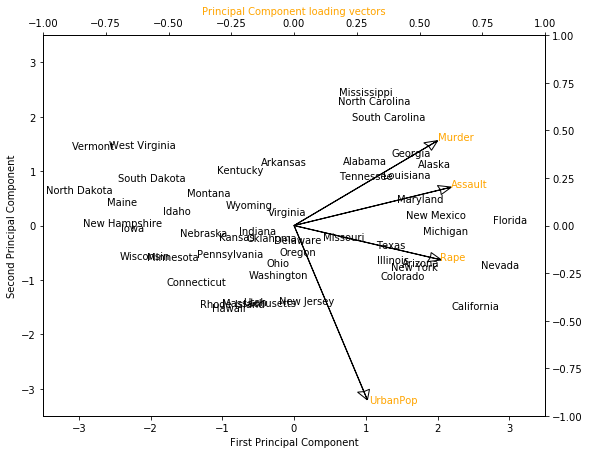

In [14]:
fig , ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)
#plot the points in the PCA plane:
for kk in range(numb_points):
    ax1.annotate(linesnames[kk],(x1p[kk],x2p[kk]),ha='center')
#ploting 1x 
#plt.arrow(0,0,invcoordchange[0,0], invcoordchange[1,0],head_width=.5, head_length=.05,overhang=10,length_includes_head=True,fill=False)
#plt.annotate('1x', xy=(invcoordchange[0,0], invcoordchange[1,0]), xytext=(invcoordchange[0,0], -2+invcoordchange[1,0]),arrowprops=dict(facecolor='blue', arrowstyle="->"),)



ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  

#ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
#ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
#ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
#ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
#ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3]);
#ploting 1rst loading vector 
for jj in range(len(columnsnames)):
    ax2.arrow(0,0,coordchange[jj,0], coordchange[jj,1],head_width=.05, head_length=.005,overhang=10,length_includes_head=True,fill=False)
    ax2.annotate(columnsnames[jj], xy=(coordchange[jj,0], coordchange[jj,1]), xytext=(a*coordchange[jj,0], a*coordchange[jj,1]),color='orange')




#plt.plot(np.array([0, invcoordchange[0,1]]),np.array([0,invcoordchange[1,1]]),color='b')
#plt.annotate('1y', xy=(invcoordchange[0,1], invcoordchange[1,1]), xytext=(invcoordchange[0,1], 2+invcoordchange[1,1]),arrowprops=dict(facecolor='black', arrowstyle="->"),)
#other options for arrows: shrink=0.001,width=2,
plt.savefig('us.pdf')
plt.show()

In [50]:
for jj in range(4):
    print(invcoordchange[0,jj], invcoordchange[1,jj])
   

0.535899474938 0.418180865421
0.58318363491 0.187985604232
0.278190874619 -0.87280619306
0.543432091446 -0.167318635402


Percentage of the variance explained by the various pca components 

In [54]:
totalvar=1/numb_points*(np.dot(x1p,x1p.T)+np.dot(x2p,x2p.T)+np.dot(x3p,x3p.T)+np.dot(x4p,x4p.T))
partialvar=[1/numb_points*np.dot(x1p,x1p.T),1/numb_points*np.dot(x2p,x2p.T),1/numb_points*np.dot(x3p,x3p.T),1/numb_points*np.dot(x4p,x4p.T)]

partialvarPC=partialvar/sum(partialvar)
-np.sort(-partialvarPC)

array([ 0.62006039,  0.24744129,  0.0891408 ,  0.04335752])

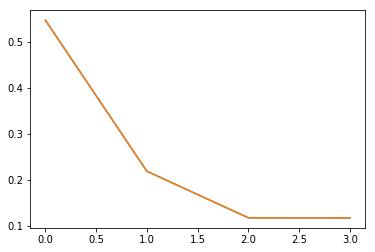

In [38]:
plt.plot(pve)
plt.show()

Keep in mind: 


https://journals.plos.org/ploscompbiol/article/authors?id=10.1371/journal.pcbi.1003531

download data HMP
http://joey711.github.io/phyloseq-demo/HMP_import_example.html

Evaluation of normalization and
analysis methods for microbiome data

https://lib.ugent.be/fulltxt/RUG01/002/214/012/RUG01-002214012_2015_0001_AC.pdf